#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

#### Importing data

In [3]:
train_data_merged=pd.read_csv("train_df .csv")

In [4]:
test_data_merged=pd.read_csv("test_df.csv")

In [5]:
train_data_merged['Date'] = pd.to_datetime(train_data_merged['Date'])

In [6]:
test_data_merged['Date'] = pd.to_datetime(test_data_merged['Date'])

In [7]:
test_data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       41088 non-null  datetime64[ns]
 1   Store                      41088 non-null  int64         
 2   DayOfWeek                  41088 non-null  int64         
 3   Open                       41088 non-null  float64       
 4   Promo                      41088 non-null  int64         
 5   StateHoliday               41088 non-null  int64         
 6   SchoolHoliday              41088 non-null  int64         
 7   StoreType                  41088 non-null  int64         
 8   Assortment                 41088 non-null  int64         
 9   CompetitionDistance        41088 non-null  float64       
 10  CompetitionOpenSinceMonth  41088 non-null  float64       
 11  CompetitionOpenSinceYear   41088 non-null  float64       
 12  Prom

In [8]:
train_data_merged.drop('SalesClass', axis=1, inplace=True)

In [9]:
train_data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 25 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Date                       1017209 non-null  datetime64[ns]
 1   Store                      1017209 non-null  int64         
 2   DayOfWeek                  1017209 non-null  int64         
 3   Open                       1017209 non-null  int64         
 4   Promo                      1017209 non-null  int64         
 5   StateHoliday               1017209 non-null  int64         
 6   SchoolHoliday              1017209 non-null  int64         
 7   StoreType                  1017209 non-null  int64         
 8   Assortment                 1017209 non-null  int64         
 9   CompetitionDistance        1017209 non-null  float64       
 10  CompetitionOpenSinceMonth  1017209 non-null  float64       
 11  CompetitionOpenSinceYear   1017209 no

# Trend Analysis

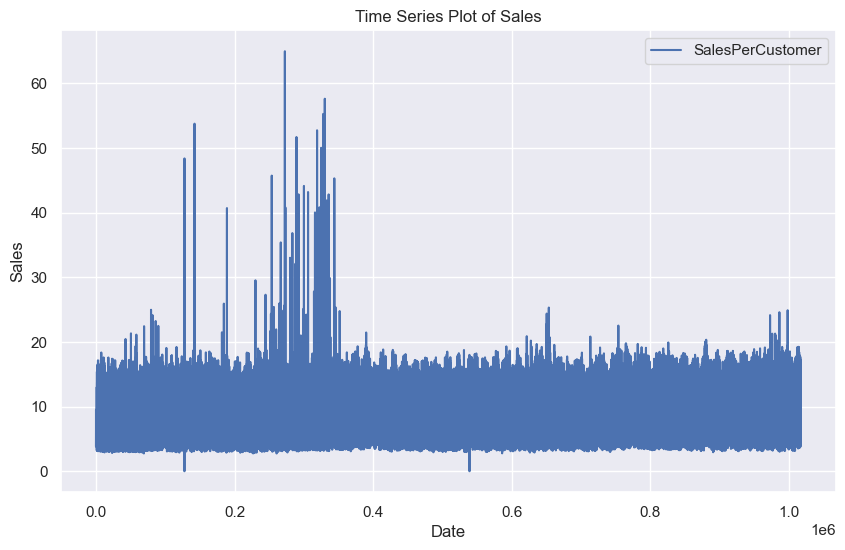

In [10]:
# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(train_data_merged['SalesPerCustomer'], label='SalesPerCustomer')
plt.title('Time Series Plot of Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

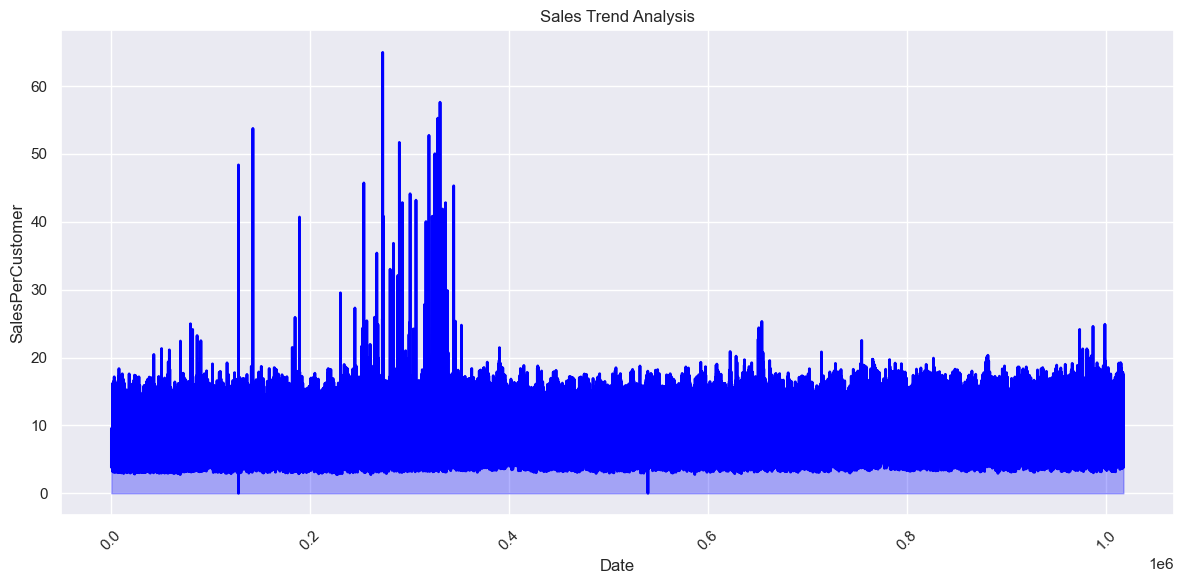

In [11]:
# Extracting the relevant columns from the train_data_merged dataset
dates = train_data_merged.index
sales = train_data_merged['SalesPerCustomer']

# Creating the plot
plt.figure(figsize=(12, 6))
plt.plot(dates, sales, color='blue', linewidth=2)
plt.fill_between(dates, sales, color='blue', alpha=0.3)  # Fill area under the curve

plt.xlabel('Date')
plt.ylabel('SalesPerCustomer')
plt.title('Sales Trend Analysis')

# plot
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


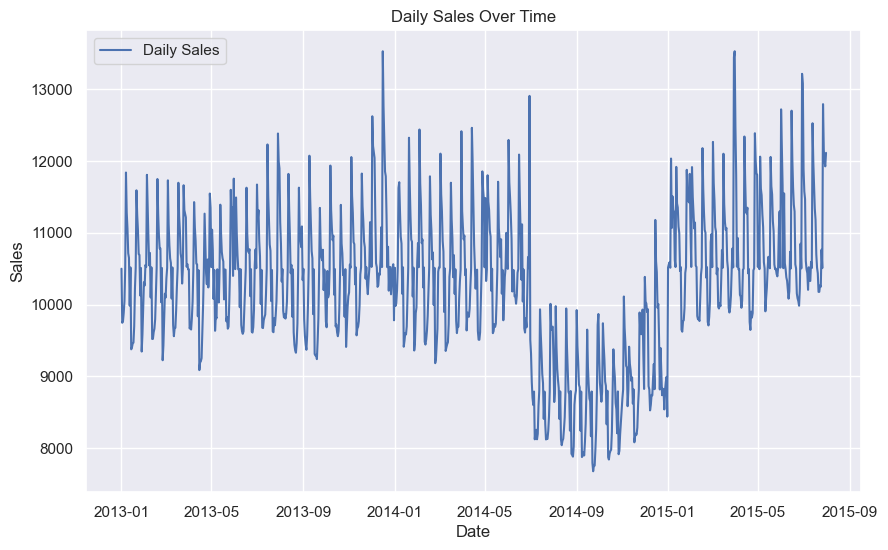

In [12]:

# Set the 'Date' column as the index
train_data_merged.set_index('Date', inplace=True)

# Resample the data on a daily basis and calculate the daily sum of sales
daily_sales = train_data_merged['SalesPerCustomer'].resample('D').sum()

# Plot daily sales over time
plt.figure(figsize=(10, 6))
plt.plot(daily_sales.index, daily_sales.values, label='Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Daily Sales Over Time')
plt.legend()
plt.show()


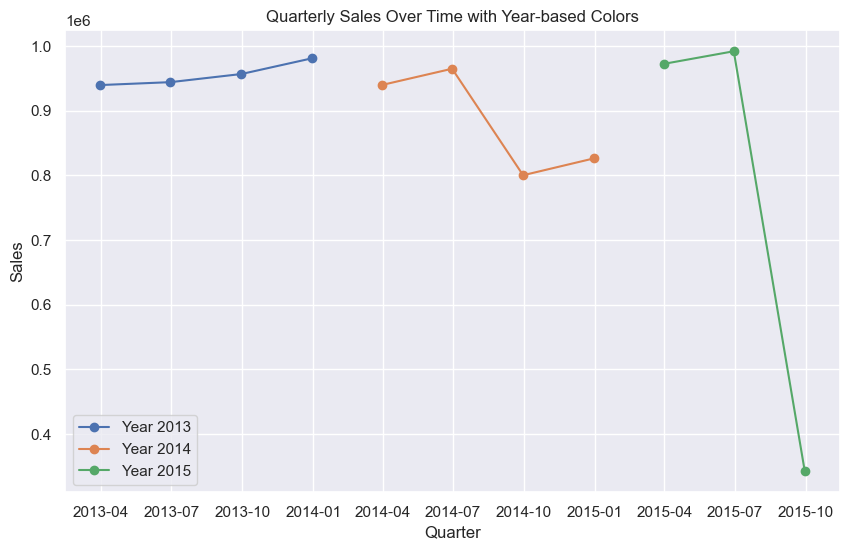

In [13]:
# Resample the data on a quarterly basis and calculate the sum of sales
quarterly_sales = train_data_merged['SalesPerCustomer'].resample('Q').sum()

# Extract years from the index
years = quarterly_sales.index.year

# Plot quarterly sales over time with colors based on year
plt.figure(figsize=(10, 6))
for year in sorted(years.unique()):
    quarterly_sales_year = quarterly_sales[years == year]
    plt.plot(quarterly_sales_year.index, quarterly_sales_year.values, marker='o', linestyle='-', label=f'Year {year}')

plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.title('Quarterly Sales Over Time with Year-based Colors')
plt.legend()
plt.grid(True)
plt.show()

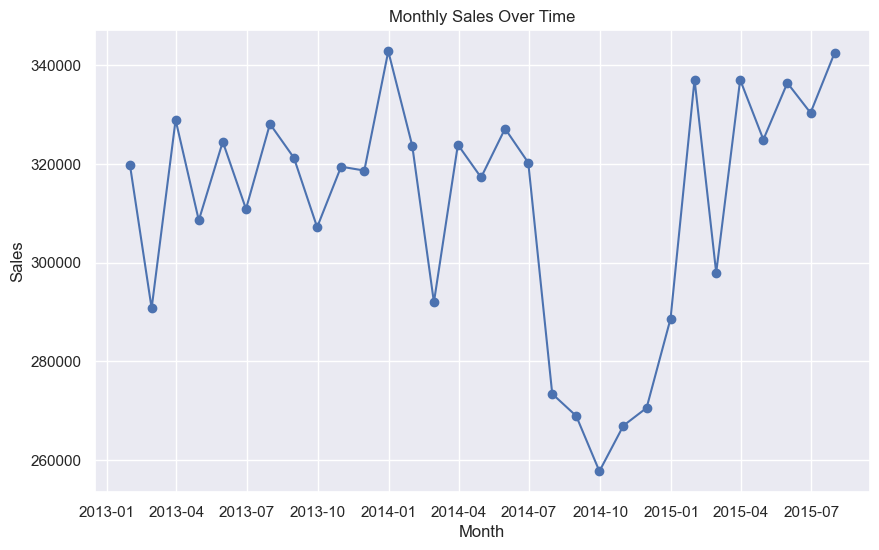

In [14]:
# Resample the data on a monthly basis and calculate the sum of sales
monthly_sales = train_data_merged['SalesPerCustomer'].resample('M').sum()

# Plot monthly sales over time
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Over Time')
plt.grid(True)
plt.show()

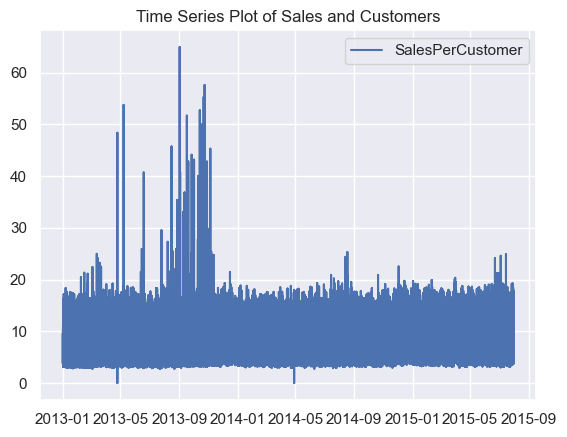

In [15]:
# Adding Multiple Time Series:
plt.plot(train_data_merged['SalesPerCustomer'], label='SalesPerCustomer')

plt.title('Time Series Plot of Sales and Customers')
plt.legend()

### Checking the trends and seasonality in the data

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

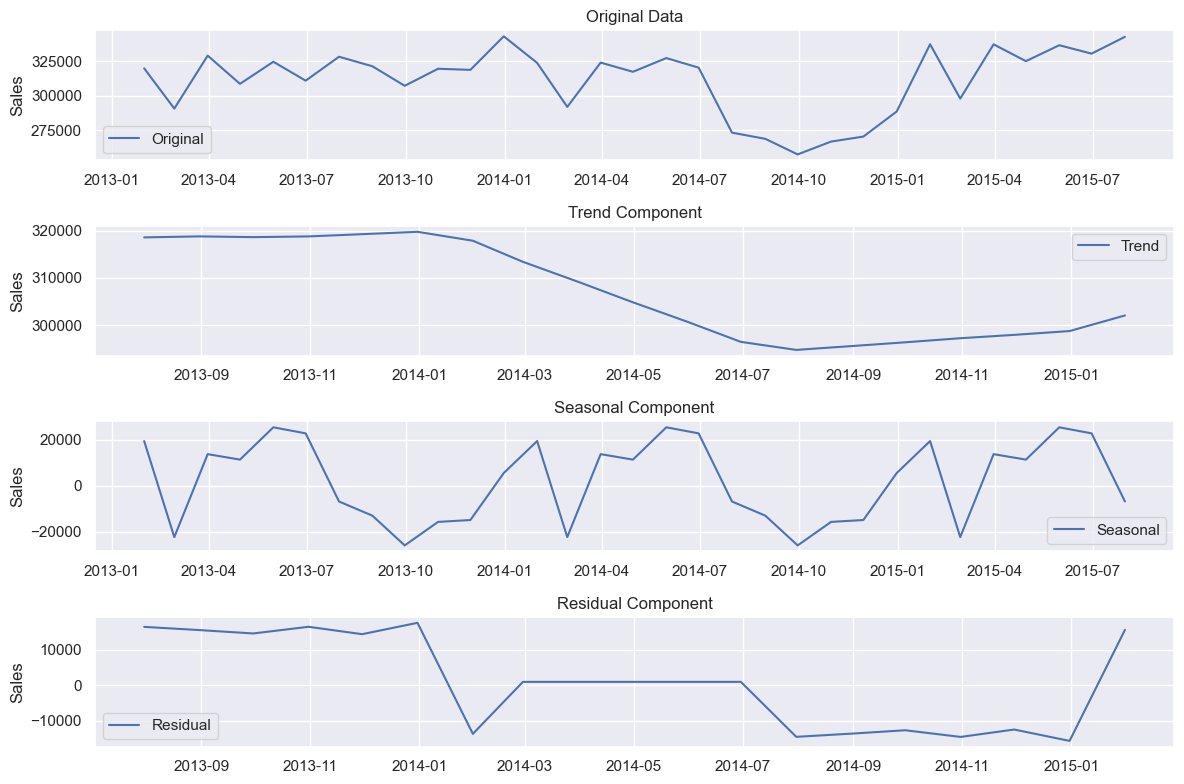

In [17]:
# Perform decomposition to check for trends and seasonality
decomposition = seasonal_decompose(monthly_sales, model='additive')

# Plot original, trend, seasonal, and residual components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(monthly_sales, label='Original')
plt.legend()
plt.ylabel('Sales')
plt.title('Original Data')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend()
plt.ylabel('Sales')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()
plt.ylabel('Sales')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual')
plt.legend()
plt.ylabel('Sales')
plt.title('Residual Component')

plt.tight_layout()
plt.show()


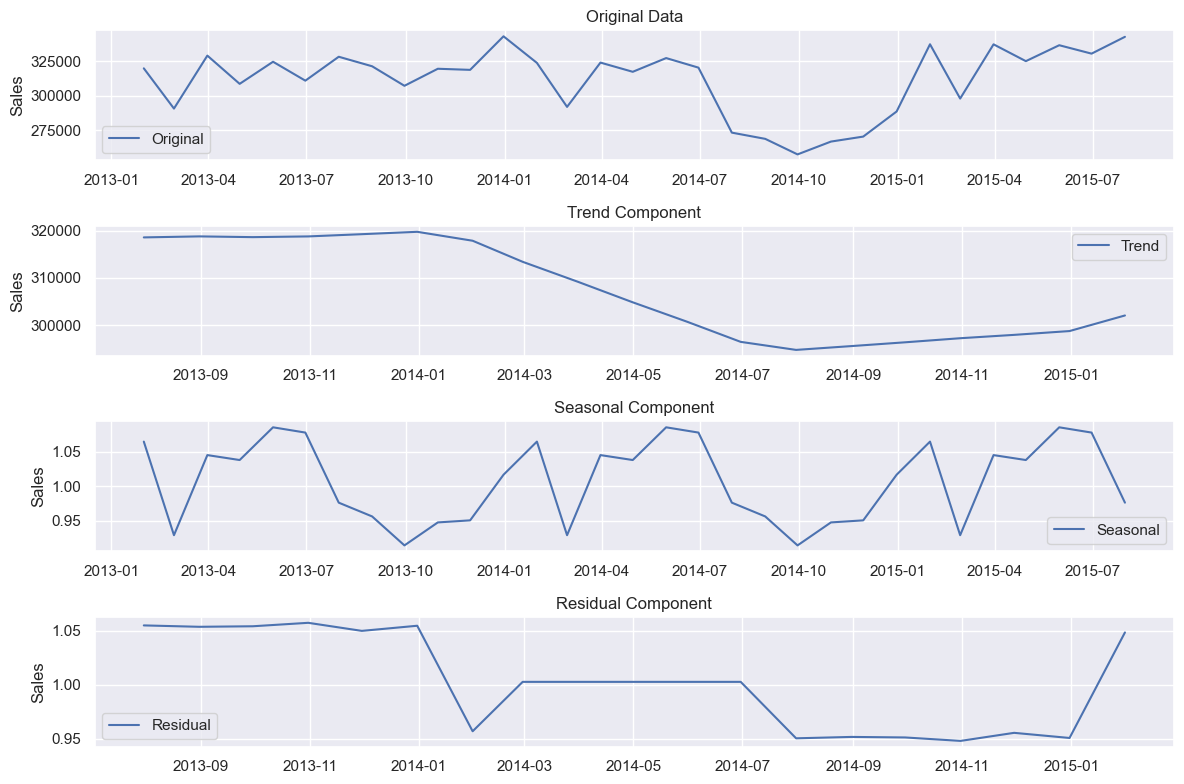

In [18]:
decomposition = seasonal_decompose(monthly_sales, model='multiplicative')

# Plot original, trend, seasonal, and residual components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(monthly_sales, label='Original')
plt.legend()
plt.ylabel('Sales')
plt.title('Original Data')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend()
plt.ylabel('Sales')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()
plt.ylabel('Sales')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual')
plt.legend()
plt.ylabel('Sales')
plt.title('Residual Component')

plt.tight_layout()
plt.show()


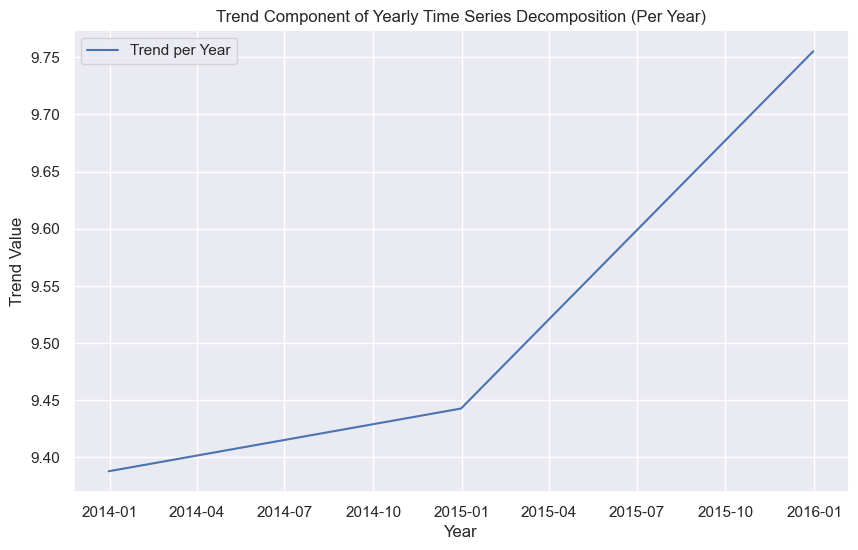

In [19]:
decomposition_result = seasonal_decompose(train_data_merged['SalesPerCustomer'], model='additive', period=365)
trend_data = decomposition_result.trend

# Grouping trend data by year and calculate mean
trend_data_per_year = trend_data.resample('Y').mean()

# Plot the trend component per year
plt.figure(figsize=(10, 6))
plt.plot(trend_data_per_year.index, trend_data_per_year, label='Trend per Year')
plt.title('Trend Component of Yearly Time Series Decomposition (Per Year)')
plt.xlabel('Year')
plt.ylabel('Trend Value')
plt.legend()
plt.show()

The yearly time series decomposition highlights a consistent increasing trend component over each year. This suggests a steady growth in sales performance, possibly influenced by expanding customer engagement, heightened demand, or effective business strategies. This valuable insight offers a strategic advantage, enabling businesses to align resources and decisions with the upward sales trajectory for enhanced growth and competitiveness.

<Figure size 2000x1000 with 0 Axes>

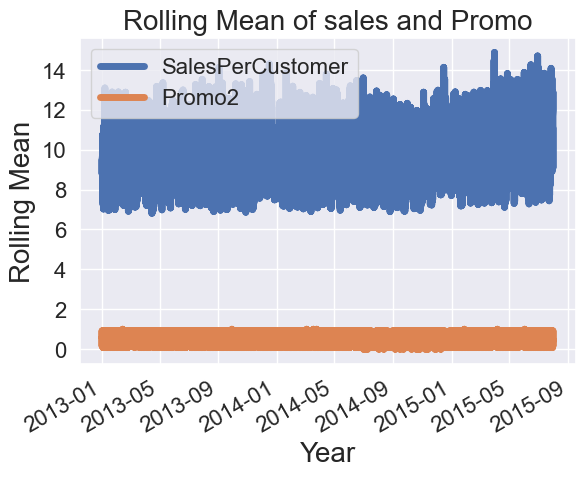

In [20]:
# Choose the columns for which you want to calculate the rolling mean
selected_columns = ['SalesPerCustomer','Promo2']  

# Calculate the rolling mean with a window size of 12 months for each selected column
rolling_means = train_data_merged[selected_columns].rolling(window=12).mean()

# Plot the rolling means of the selected columns
plt.figure(figsize=(20, 10))
rolling_means.plot(linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Rolling Mean', fontsize=20)
plt.title('Rolling Mean of sales and Promo', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)
plt.show()

# Resampled time series

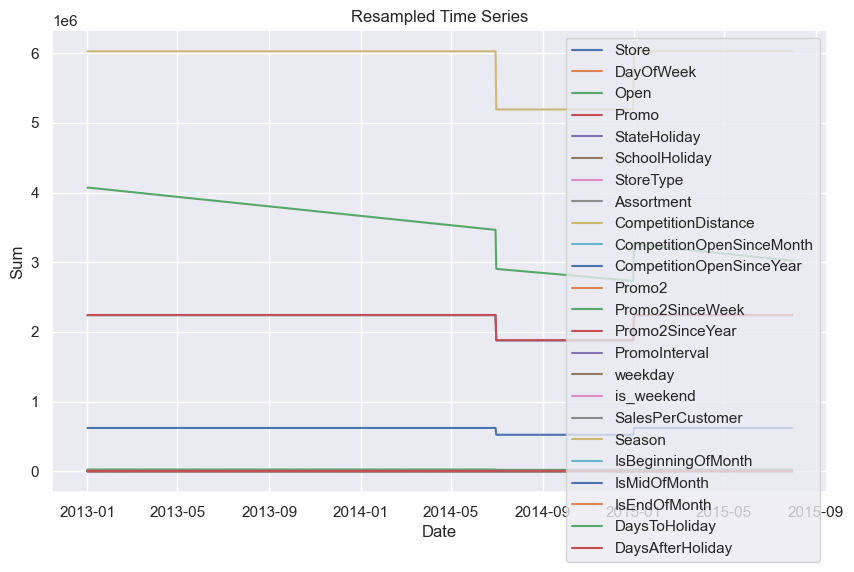

In [21]:
# Convert the index to datetime format
train_data_merged.index = pd.to_datetime(train_data_merged.index)

# Selecting only numeric columns for summation
numeric_columns = train_data_merged.select_dtypes(include=['number']).columns

# Resampling the data
train_data_resampled = train_data_merged[numeric_columns].resample('D').sum()

# Plot the time series
plt.figure(figsize=(10, 6))
for column in numeric_columns:
    plt.plot(train_data_resampled.index, train_data_resampled[column], label=column)
plt.xlabel('Date')
plt.ylabel('Sum')
plt.title('Resampled Time Series')
plt.legend()
plt.show()


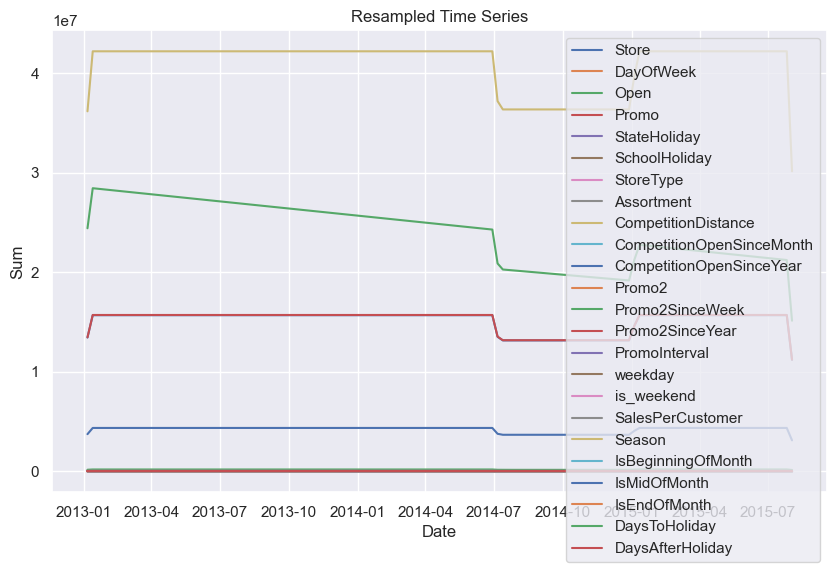

In [22]:
# Resampling the data at a lower frequency (e.g., weekly) for better visualization
resample_frequency = 'W'  # Adjust this frequency as needed
train_data_resampled = train_data_merged[numeric_columns].resample(resample_frequency).sum()

# Plot the time series
plt.figure(figsize=(10, 6))
for column in numeric_columns:
    plt.plot(train_data_resampled.index, train_data_resampled[column], label=column)
plt.xlabel('Date')
plt.ylabel('Sum')
plt.title('Resampled Time Series')
plt.legend()
plt.show()


In [23]:
# Resampling the data to a weekly frequency and calculating the mean
columns_to_resample = ['SalesPerCustomer']  
train_data_weekly_mean = train_data_merged[columns_to_resample].resample('W').mean()

print(train_data_weekly_mean)

            SalesPerCustomer
Date                        
2013-01-06          9.039167
2013-01-13          9.743876
2013-01-20          8.730926
2013-01-27          9.725311
2013-02-03          9.033812
...                      ...
2015-07-05         10.546559
2015-07-12          9.344593
2015-07-19         10.241203
2015-07-26          9.298613
2015-08-02         10.938534

[135 rows x 1 columns]


## Calculate rolling standard deviation

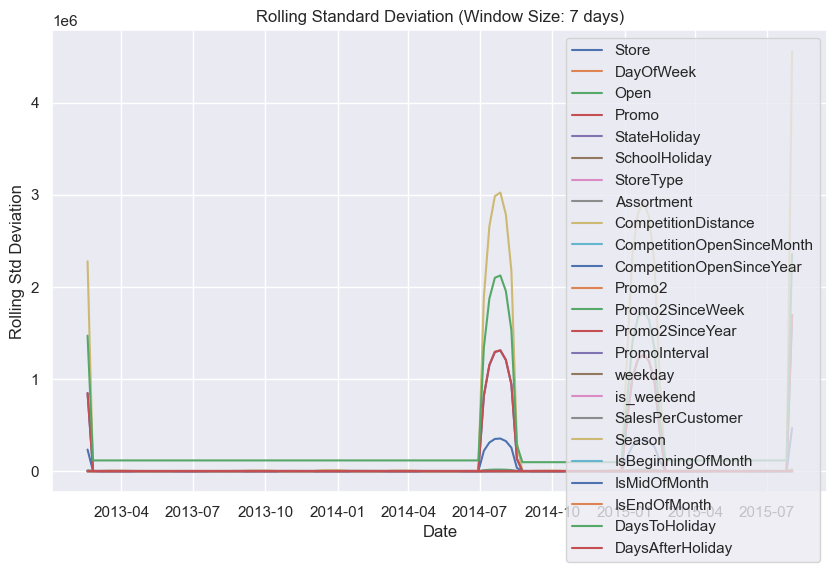

In [24]:
window_size = 7 
rolling_std = train_data_resampled.rolling(window=window_size).std()

# Plotting the rolling standard deviation
plt.figure(figsize=(10, 6))
for column in numeric_columns:
    plt.plot(rolling_std.index, rolling_std[column], label=column)
plt.xlabel('Date')
plt.ylabel('Rolling Std Deviation')
plt.title(f'Rolling Standard Deviation (Window Size: {window_size} days)')
plt.legend()
plt.show()

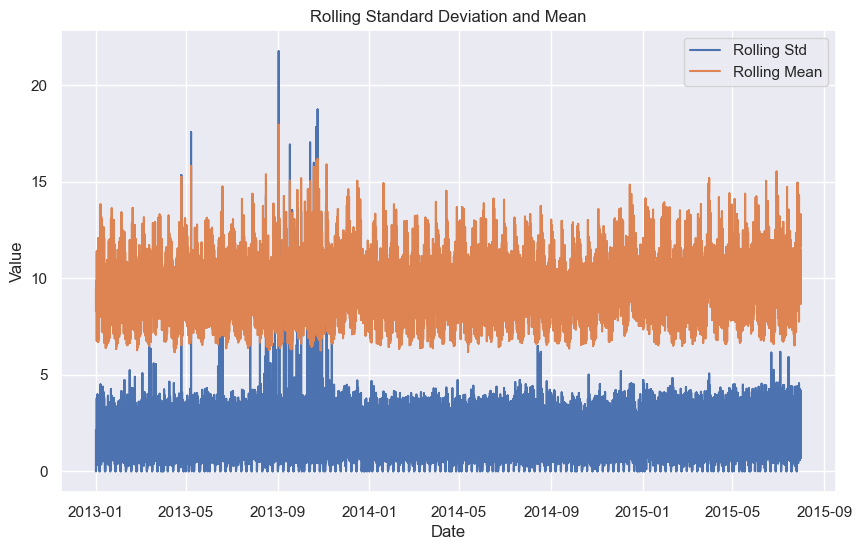

In [25]:
# Columns to calculate rolling statistics for
columns_to_calculate = ['SalesPerCustomer']

# Calculating rolling standard deviation and mean with a window size of 7 days
rolling_std = train_data_merged[columns_to_calculate].rolling(window=7).std()
rolling_mean = train_data_merged[columns_to_calculate].rolling(window=7).mean()

# Plotting the rolling statistics
plt.figure(figsize=(10, 6))
plt.plot(rolling_std, label='Rolling Std')
plt.plot(rolling_mean, label='Rolling Mean')
plt.title('Rolling Standard Deviation and Mean')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [26]:

# descriptive statistics of rolling standard deviation and mean
print("Rolling Standard Deviation:")
print(rolling_std.describe())

print("\nRolling Mean:")
print(rolling_mean.describe())

Rolling Standard Deviation:
       SalesPerCustomer
count      1.017203e+06
mean       1.655297e+00
std        8.962106e-01
min        0.000000e+00
25%        1.244324e+00
50%        1.765339e+00
75%        2.225763e+00
max        2.176325e+01

Rolling Mean:
       SalesPerCustomer
count      1.017203e+06
mean       9.493613e+00
std        9.855430e-01
min        6.170842e+00
25%        8.854569e+00
50%        9.493619e+00
75%        1.000189e+01
max        1.795643e+01


# Seasonality Plot:
The seasonality plot displays repeating patterns that occur at regular intervals. It helps identify consistent patterns that recur over time. These patterns could be daily, weekly, monthly, or even yearly. In retail, for instance, if 'Sales' exhibit spikes around the same time each year (e.g., holiday season), it indicates a strong seasonal pattern.

In [27]:
import statsmodels.api as sm

#### first differencing

In [28]:
# Resample to weekly frequency and calculate mean sales
weekly_sales = train_data_merged['SalesPerCustomer'].resample('W').mean()


In [29]:
# Calculate first differences
diff_series = weekly_sales.diff(periods=1).dropna()


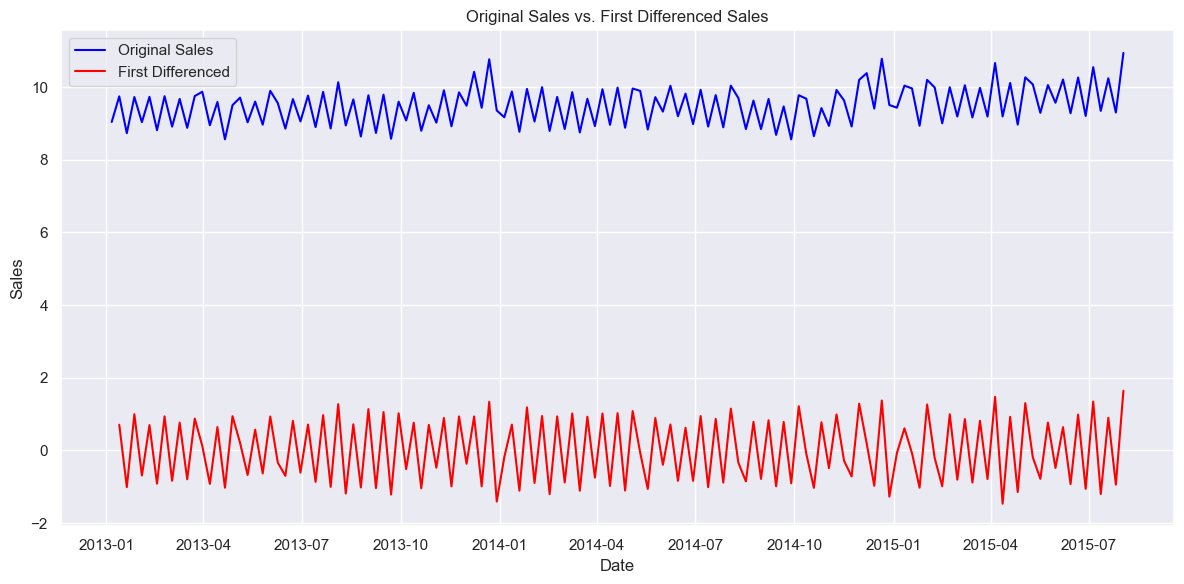

In [30]:

# Create a single plot
plt.figure(figsize=(12, 6))

# Original time series
plt.plot(weekly_sales, label='Original Sales', color='blue')

# First differenced series
plt.plot(diff_series, label='First Differenced', color='red')

plt.title('Original Sales vs. First Differenced Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()

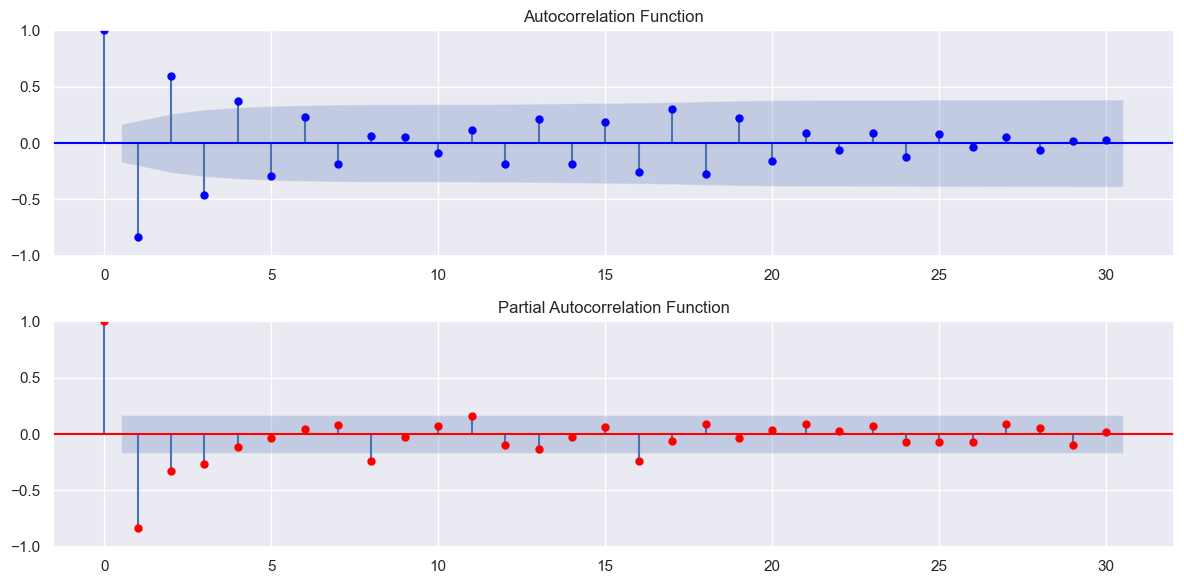

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create a single plot for ACF and PACF with colors
plt.figure(figsize=(12, 6))

# ACF plot with color
plt.subplot(2, 1, 1)
plot_acf(diff_series, lags=30, ax=plt.gca(), title='Autocorrelation Function', color='blue')

# PACF plot with color
plt.subplot(2, 1, 2)
plot_pacf(diff_series, lags=30, ax=plt.gca(), title='Partial Autocorrelation Function', color='red')

plt.tight_layout()
plt.show()

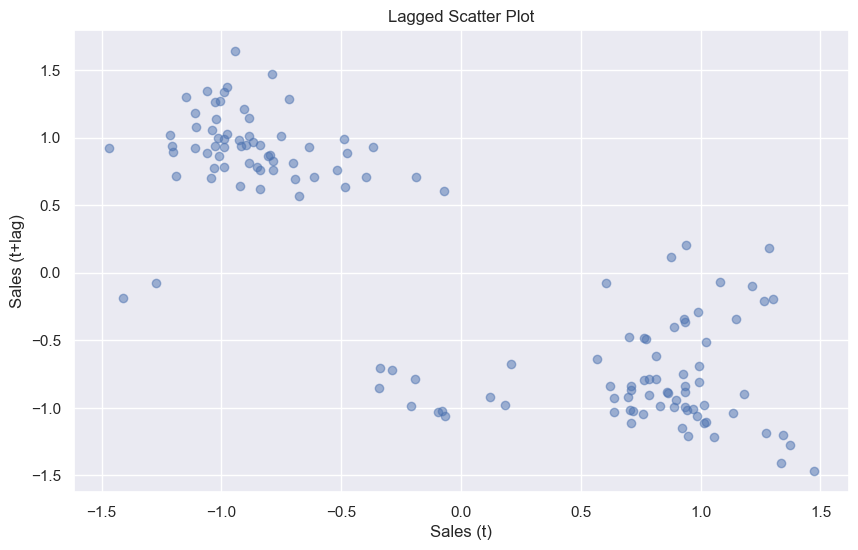

In [32]:
# Create a lagged scatter plot
plt.figure(figsize=(10, 6))
lagged_sales = pd.concat([diff_series, diff_series.shift(-1)], axis=1)
lagged_sales.columns = ['SalesPerCustomer', 'Lagged Sales']
plt.scatter(lagged_sales['SalesPerCustomer'], lagged_sales['Lagged Sales'], alpha=0.5)
plt.title('Lagged Scatter Plot')
plt.xlabel('Sales (t)')
plt.ylabel('Sales (t+lag)')
plt.show()

" t" refers to the current time period or observation, and "t+lag" refers to a future time period that is a specified number of steps ahead of the current time period.

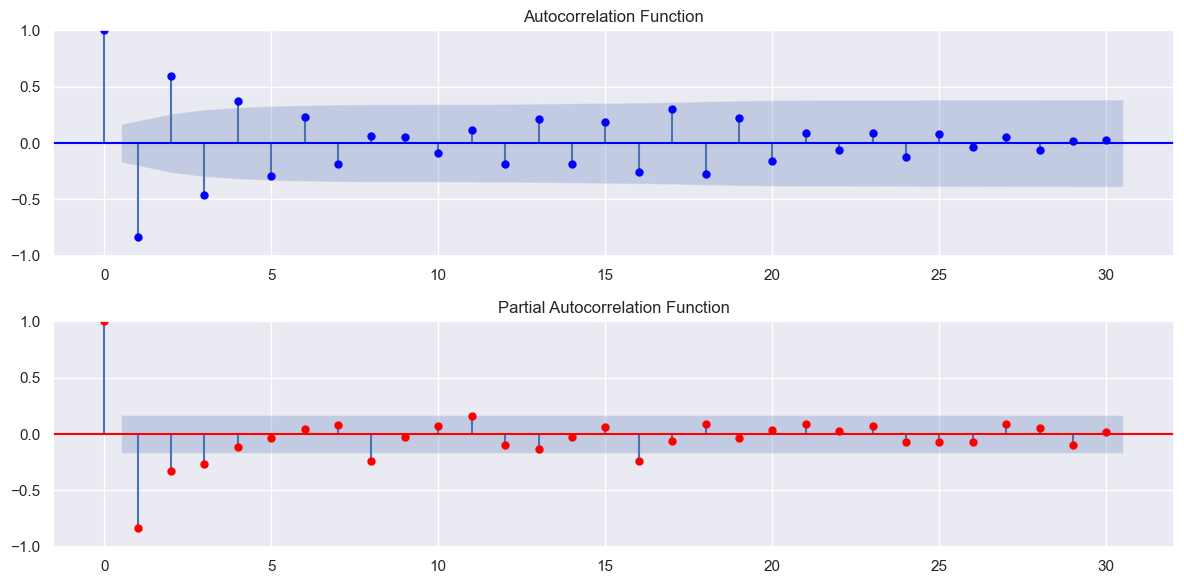

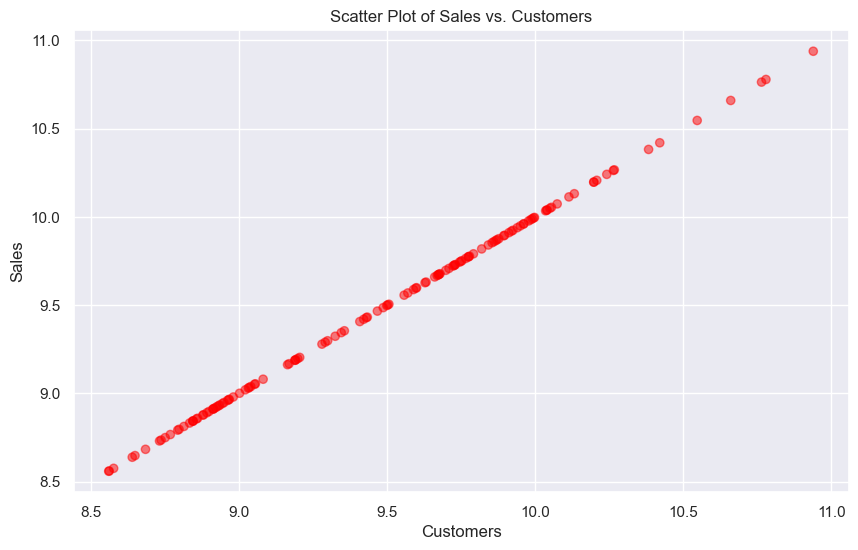

In [33]:
# Resample to weekly frequency and calculate mean sales, customers, and promo
weekly_data = train_data_merged.resample('W').agg({
    'SalesPerCustomer': 'mean',
    'Promo': 'sum'  # Assuming Promo is a binary value (0 or 1)
})

# Calculate first differences
diff_series = weekly_data['SalesPerCustomer'].diff(periods=1).dropna()

# Create a single plot for ACF and PACF with colors
plt.figure(figsize=(12, 6))

# ACF plot with color
plt.subplot(2, 1, 1)
plot_acf(diff_series, lags=30, ax=plt.gca(), title='Autocorrelation Function', color='blue')

# PACF plot with color
plt.subplot(2, 1, 2)
plot_pacf(diff_series, lags=30, ax=plt.gca(), title='Partial Autocorrelation Function', color='red')

plt.tight_layout()
plt.show()

# Create a scatter plot of sales vs. customers with color by Promo
plt.figure(figsize=(10, 6))
colors = ['blue' if promo == 1 else 'red' for promo in weekly_data['Promo']]
plt.scatter(weekly_data['SalesPerCustomer'], weekly_data['SalesPerCustomer'], c=colors, alpha=0.5)
plt.title('Scatter Plot of Sales vs. Customers')
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

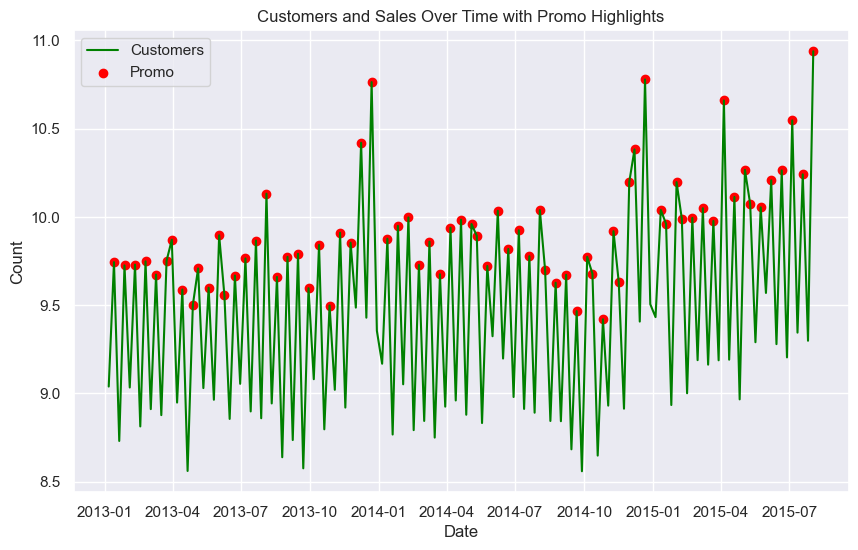

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(weekly_data['SalesPerCustomer'], label='Customers', color='green')

promo_indices = weekly_data[weekly_data['Promo'] > 0].index
plt.scatter(promo_indices, weekly_data.loc[promo_indices, 'SalesPerCustomer'], color='red', label='Promo')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Customers and Sales Over Time with Promo Highlights')
plt.legend()
plt.show()

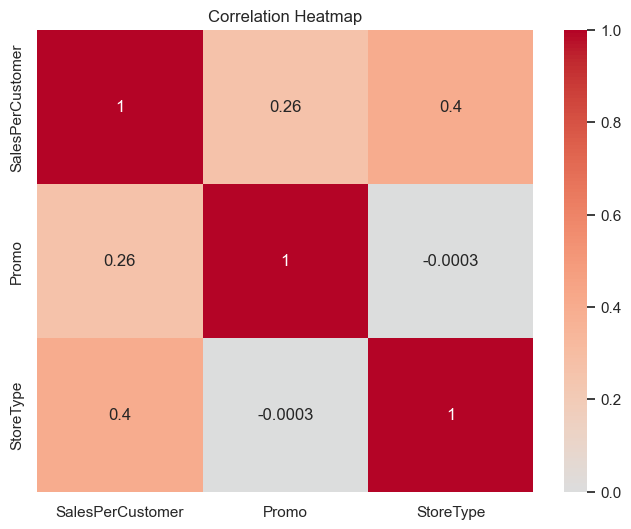

In [35]:
selected_columns = ['SalesPerCustomer', 'Promo','StoreType']
selected_data = train_data_merged[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

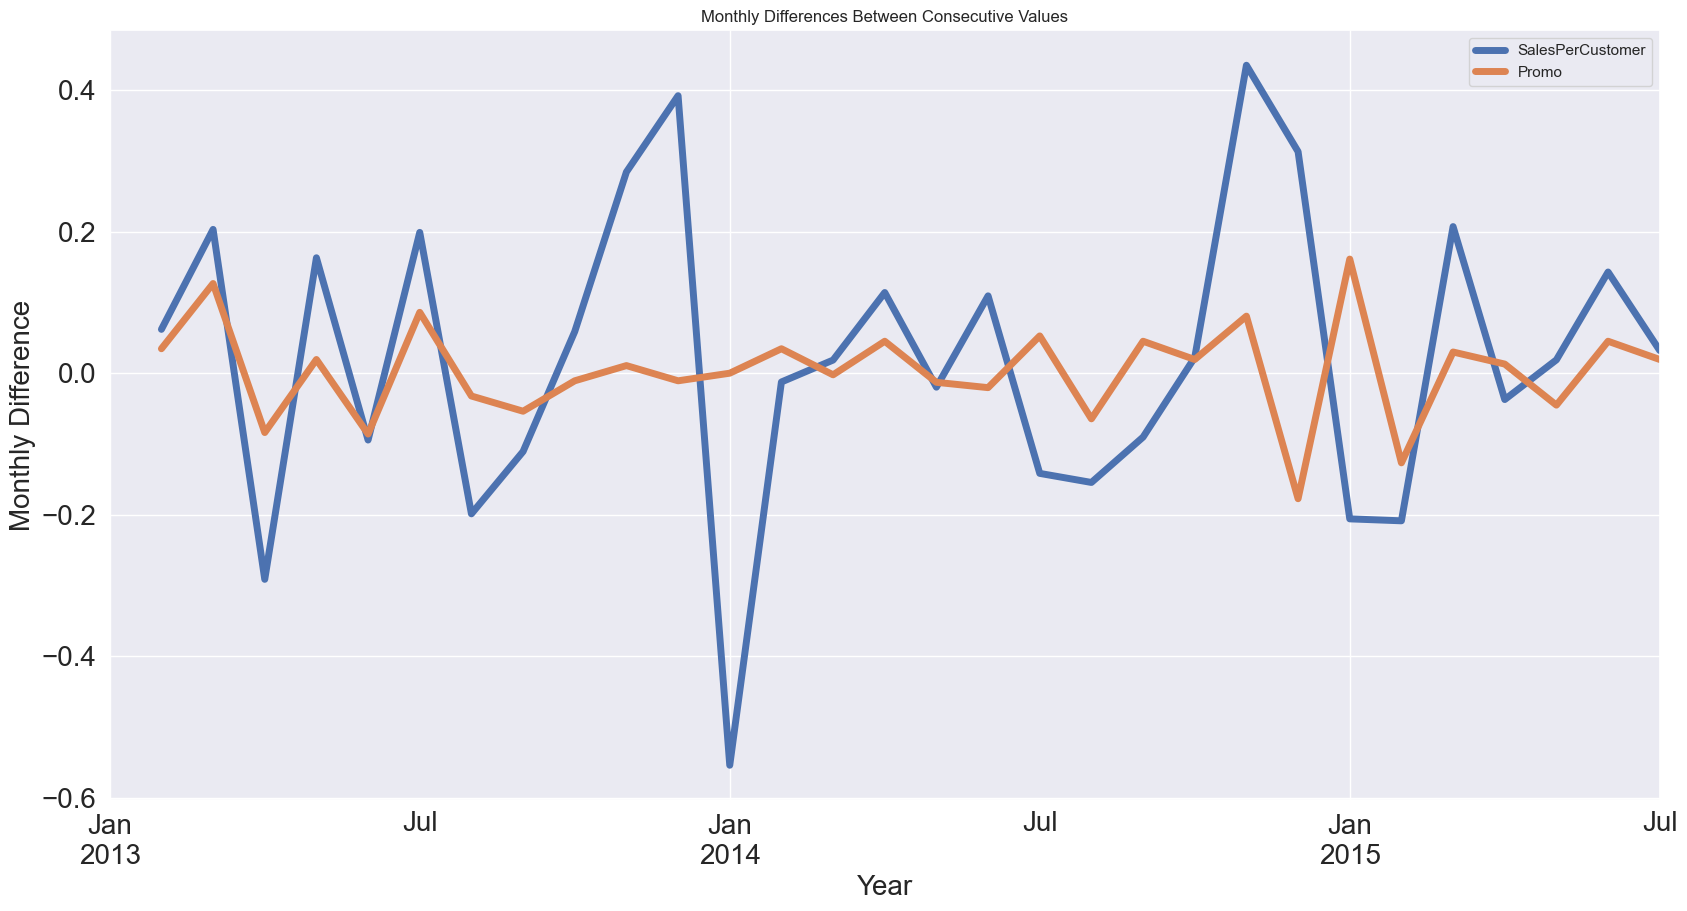

In [36]:
# Select the columns you want to analyze
selected_columns = ['SalesPerCustomer', 'Promo']

# Resample the data to monthly frequency
monthly_data = train_data_merged[selected_columns].resample('M').mean()

# Calculate the differences between consecutive monthly values
monthly_diff_data = monthly_data.diff()

# Plot the differences
monthly_diff_data.plot(figsize=(20, 10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Monthly Difference', fontsize=20)
plt.title('Monthly Differences Between Consecutive Values')
plt.show()

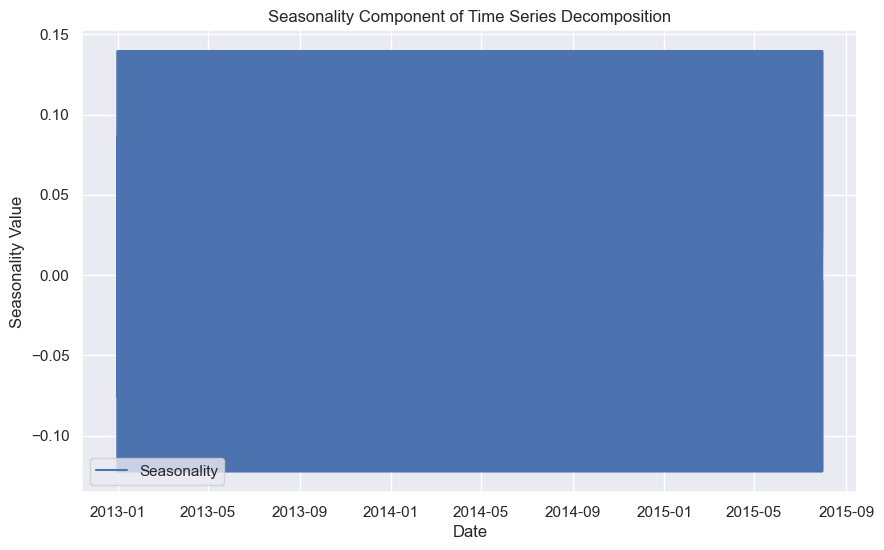

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Performing time series decomposition on the 'Sales' column with yearly frequency
decomposition_result = seasonal_decompose(train_data_merged['SalesPerCustomer'], model='additive', period=365)
seasonality_data = decomposition_result.seasonal

# Create a time index for the x-axis (assuming 'Date' is your index)
time_index = seasonality_data.index

# Plot the seasonality component
plt.figure(figsize=(10, 6))
plt.plot(time_index, seasonality_data, label='Seasonality')
plt.title('Seasonality Component of Time Series Decomposition')
plt.xlabel('Date')
plt.ylabel('Seasonality Value')
plt.legend()
plt.show()

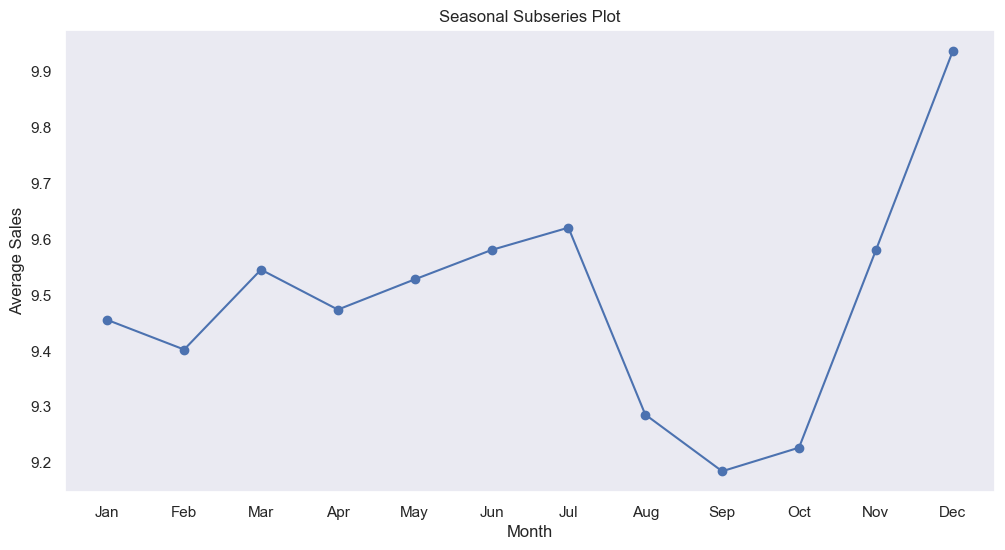

In [38]:
# Seasonal Subseries Plot:

train_data_merged.index = pd.to_datetime(train_data_merged.index)

# Grouping the data by month and calculating the mean for each month
monthly_mean = train_data_merged['SalesPerCustomer'].groupby(train_data_merged.index.month).mean()

# Creating a subseries plot for each month
plt.figure(figsize=(12, 6))
monthly_mean.plot(marker='o')
plt.title('Seasonal Subseries Plot')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()

plt.show()

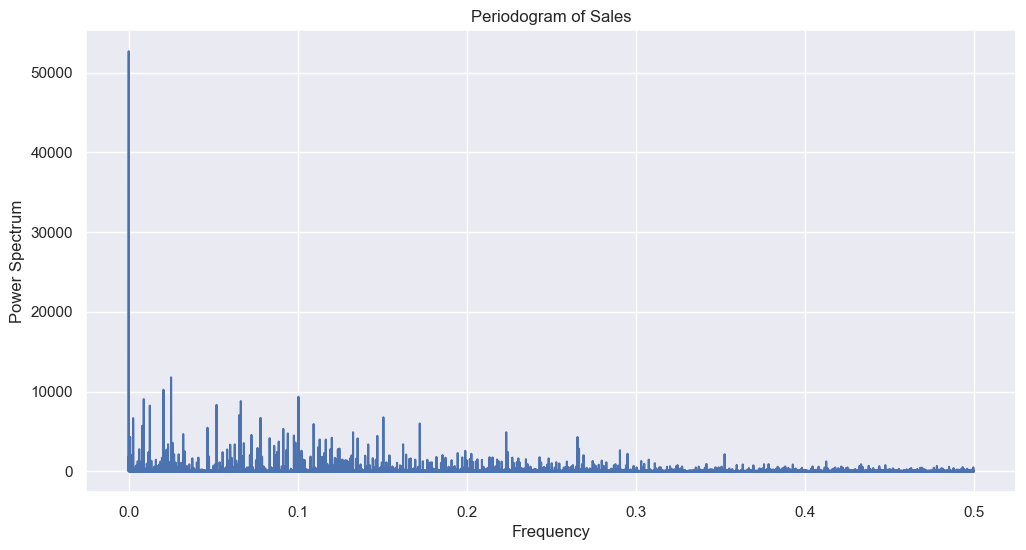

In [39]:
# Periodogram
from scipy.signal import periodogram

# Computing the periodogram of the time series
frequencies, power_spectrum = periodogram(train_data_merged['SalesPerCustomer'])

# Plotting the periodogram
plt.figure(figsize=(12, 6))
plt.plot(frequencies, power_spectrum)
plt.title('Periodogram of Sales')
plt.xlabel('Frequency')
plt.ylabel('Power Spectrum')
plt.show()

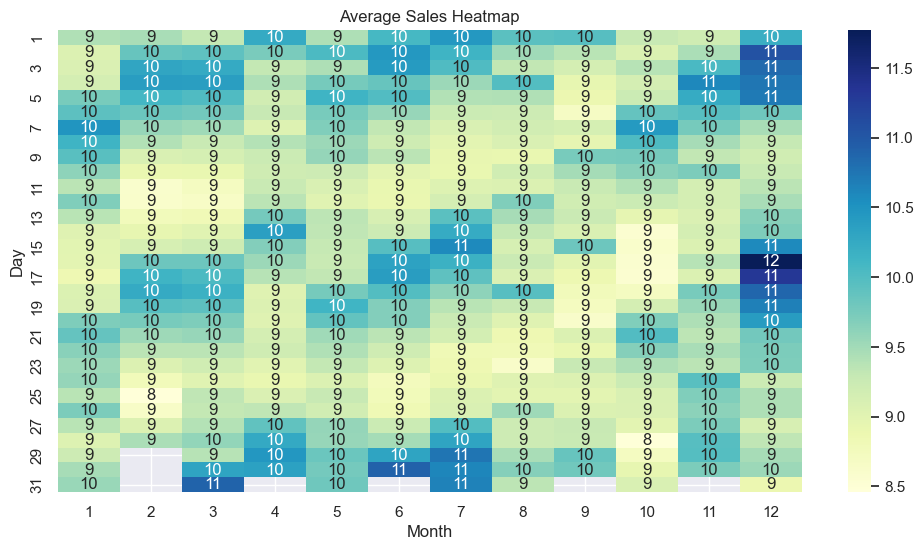

In [40]:
# Heatmap
import numpy as np

# heatmap of average sales across days and months
heatmap_data = train_data_merged.pivot_table(values='SalesPerCustomer', index=train_data_merged.index.day, columns=train_data_merged.index.month, aggfunc=np.mean)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Average Sales Heatmap')
plt.xlabel('Month')
plt.ylabel('Day')
plt.show()


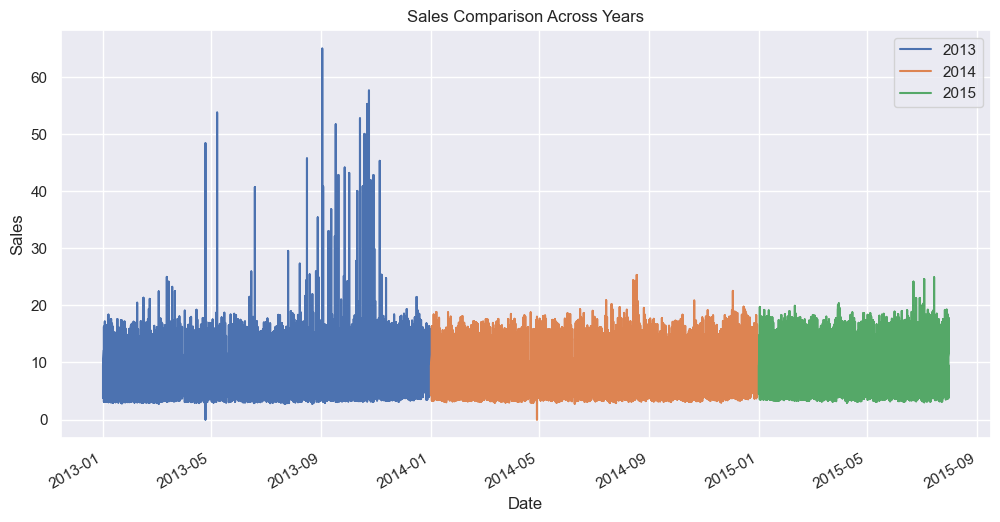

In [41]:
# Filtering data for each year
sales_2013 = train_data_merged[train_data_merged.index.year == 2013]['SalesPerCustomer']
sales_2014 = train_data_merged[train_data_merged.index.year == 2014]['SalesPerCustomer']
sales_2015 = train_data_merged[train_data_merged.index.year == 2015]['SalesPerCustomer']

# Plotting comparison across years
plt.figure(figsize=(12, 6))
sales_2013.plot(label='2013')
sales_2014.plot(label='2014')
sales_2015.plot(label='2015')
plt.title('Sales Comparison Across Years')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Stationarity Check

In [42]:
from statsmodels.tsa.stattools import adfuller

In [43]:
# 'Date' is index and 'Sales' is target variable
time_series = train_data_merged['SalesPerCustomer']

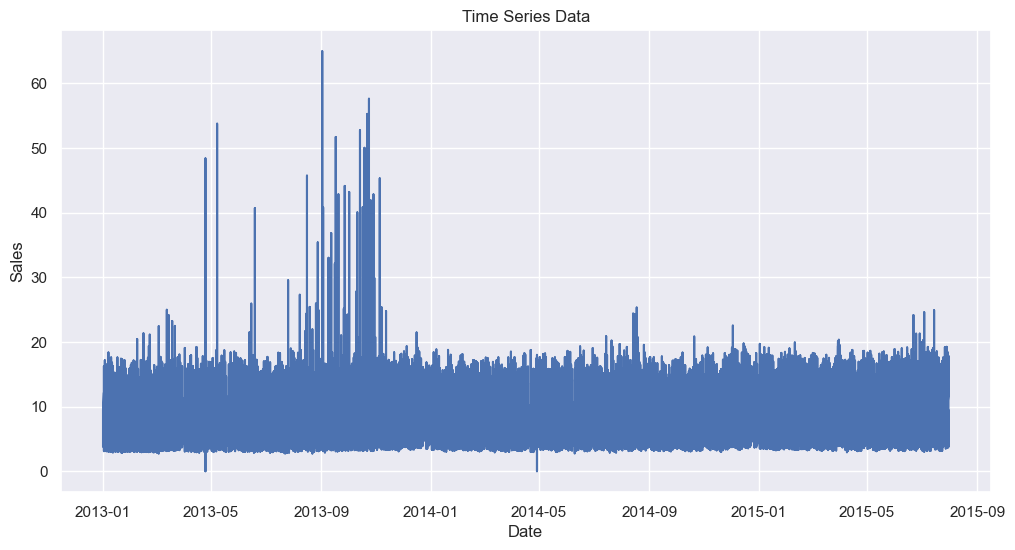

In [44]:
# Visualizing the time series data
plt.figure(figsize=(12, 6))
plt.plot(train_data_merged['SalesPerCustomer'])
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Cyclicality:
Cyclicality refers to the presence of long-term periodic patterns in a time series that are not tied to a fixed frequency like seasonality. These cycles usually last longer than a year and are not as regular as seasonal patterns. Cycles can be caused by economic, political, or social factors that influence the data over time. Unlike seasonality, cyclic patterns are not as predictable and can vary in amplitude and duration.

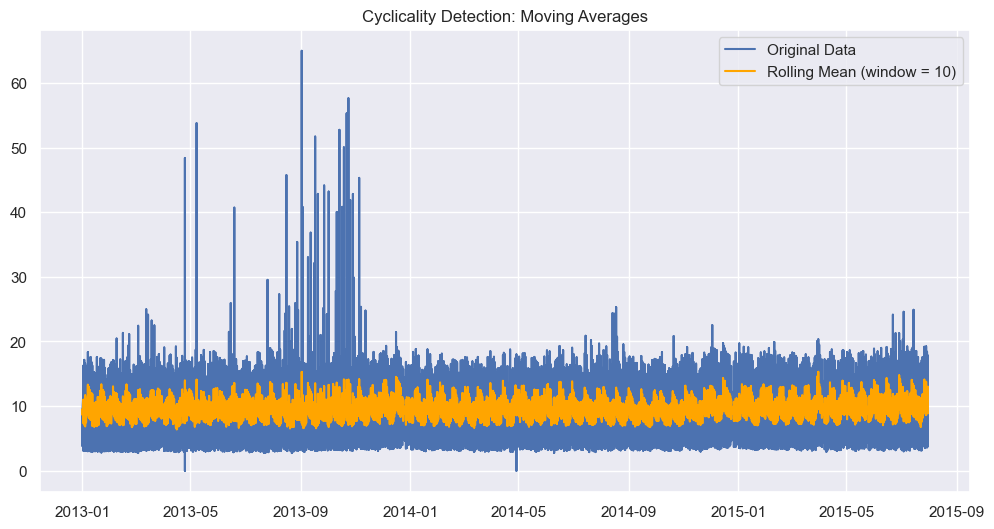

In [45]:
# Calculate rolling mean with a window size of your choice
window_size = 10  #
rolling_mean = train_data_merged['SalesPerCustomer'].rolling(window=window_size).mean()

# Plot the original data and rolling mean
plt.figure(figsize=(12, 6))
plt.plot(train_data_merged['SalesPerCustomer'], label='Original Data')
plt.plot(rolling_mean, label=f'Rolling Mean (window = {window_size})', color='orange')
plt.title('Cyclicality Detection: Moving Averages')
plt.legend()
plt.show()

# Irregularity:
Irregularity, also known as residual or noise, represents the random fluctuations and unpredictable components present in a time series data. It encompasses all the factors that are not accounted for by the trend, seasonality, and cyclic patterns. Irregular components can be caused by random events, measurement errors, or other external factors that are difficult to model.

In [46]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller


In [47]:
# Define a function to perform the ADF test
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])
    print("Is Stationary:", result[1] <= 0.05)

# Subsample a portion of the time series
subsample_size = 1000  # Adjust the size as needed
subsampled_series = train_data_merged['SalesPerCustomer'].sample(n=subsample_size)

# Perform the ADF test on the subsampled series
adf_test(subsampled_series)


ADF Statistic: -30.148583307186687
p-value: 0.0
Critical Values: {'1%': -3.4369127451400474, '5%': -2.864437475834273, '10%': -2.568312754566378}
Is Stationary: True


In [48]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Subsample a portion of the time series
subsample_size = 1000  
subsampled_series = train_data_merged['SalesPerCustomer'].sample(n=subsample_size)

# Perform the ADF test on the subsampled series
adf_test(subsampled_series)

ADF Statistic: -24.59459062577235
p-value: 0.0
Critical Values: {'1%': -3.4369193380671, '5%': -2.864440383452517, '10%': -2.56831430323573}
Is Stationary: True


In [49]:
# Resample the time series data to a larger time interval (e.g., monthly)
monthly_aggregated_series = train_data_merged['SalesPerCustomer'].resample('M').sum()

# Perform the ADF test on the aggregated series
adf_test(monthly_aggregated_series)

ADF Statistic: -2.7305341041877944
p-value: 0.06890192551500236
Critical Values: {'1%': -3.6699197407407405, '5%': -2.9640707407407407, '10%': -2.621171111111111}
Is Stationary: False


In [50]:
import copy
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 15, 10
warnings.filterwarnings('ignore')

In [51]:
def show_plot(
    data,
    figsize=(15, 10),
    color="blue",
    linestyle="-",
    xlabel="Time",
    ylabel="Value",
    label=None,
):
    plt.figure(figsize=figsize)
    plt.plot(data.index, data, color=color, linestyle=linestyle, label=label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc=2)


# ARIMA (AutoRegressive Integrated Moving Average):
ARIMA models are versatile and can handle both trend and seasonality in data. They consist of three main components: AutoRegressive (AR) terms, Integrated (I) terms for differencing, and Moving Average (MA) terms. Model selection involves determining the order of these components (p, d, q) based on ACF and PACF plots. You can use functions like auto_arima from the pmdarima library for automatic ARIMA order selection. SARIMA (Seasonal ARIMA)

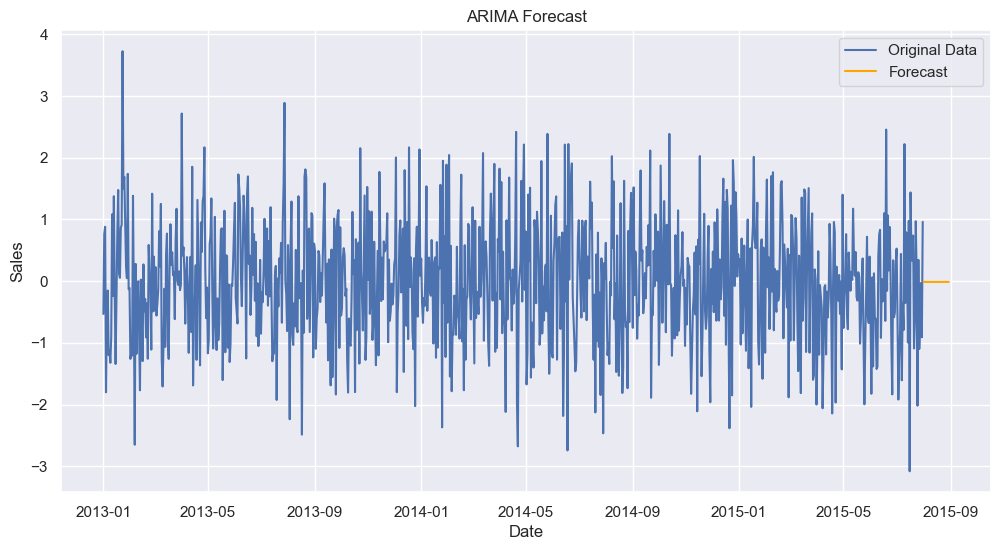

In [52]:
from statsmodels.tsa.arima.model import ARIMA


time_series_data = train_data_merged['SalesPerCustomer']

min_date = pd.to_datetime('2013-01-01')
max_date = pd.to_datetime('2015-07-31')
date_rng = pd.date_range(start=min_date, end=max_date, freq='D')
time_series_data = pd.Series(np.random.randn(len(date_rng)), index=date_rng)

# Fit ARIMA model
model = ARIMA(time_series_data, order=(1, 0, 0))
model_fit = model.fit()

# Make predictions for the next 30 days
forecast = model_fit.forecast(steps=30)

# Plot the original time series and the forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series_data, label='Original Data')
plt.plot(forecast, label='Forecast', color='orange')
plt.legend()
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [53]:
pip install pmdarima

DEPRECATION: Loading egg at c:\users\manil\anaconda3\lib\site-packages\rossman_sales_project-0.0.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\manil\anaconda3\lib\site-packages\rossman_sales_project-0.1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [54]:
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller


print(train_data_merged.dtypes)


# Downsample the 'Sales' column to monthly frequency
monthly_sales = train_data_merged.resample('M')['SalesPerCustomer'].sum()

# Define a function to perform ADF test for stationarity
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    p_value = result[1]
    return p_value <= 0.05

# Check if differencing is needed
if adf_test(monthly_sales):
    d = 0
else:
    d = 1

# Use auto_arima for automatic ARIMA order selection
model = auto_arima(monthly_sales, start_p=1, start_q=1,
                   max_p=3, max_q=3, m=12,
                   start_P=0, seasonal=True,
                   d=d, D=1, trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

# Fit the ARIMA model
model_fit = model.fit(monthly_sales)

# Print the model summary
print(model_fit.summary())


Store                          int64
DayOfWeek                      int64
Open                           int64
Promo                          int64
StateHoliday                   int64
SchoolHoliday                  int64
StoreType                      int64
Assortment                     int64
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                  int64
weekday                        int64
is_weekend                     int64
SalesPerCustomer             float64
Season                         int64
IsBeginningOfMonth             int64
IsMidOfMonth                   int64
IsEndOfMonth                   int64
DaysToHoliday                  int64
DaysAfterHoliday               int64
dtype: object
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=417.820, Tim

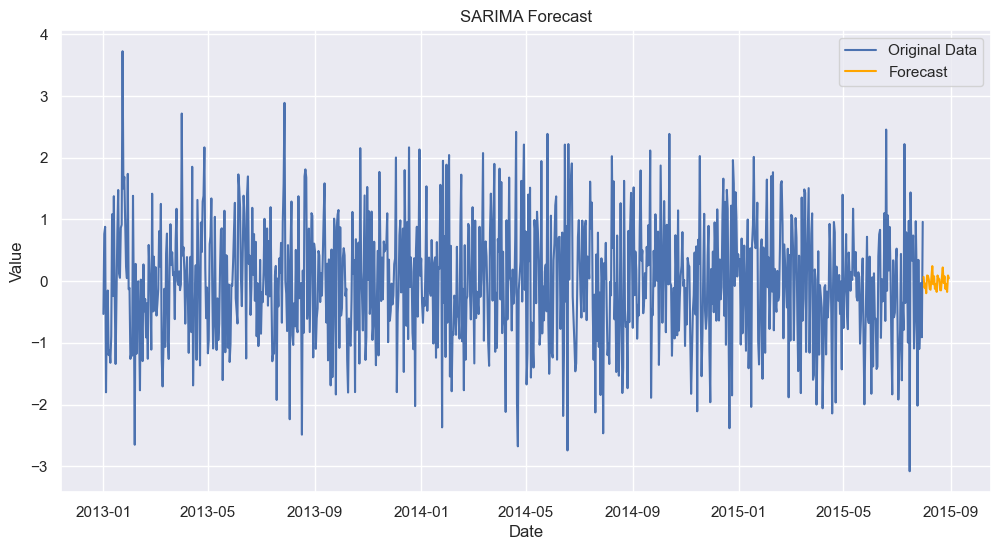

In [55]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Fit SARIMA model
model = SARIMAX(time_series_data, order=(1, 0, 0), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Make predictions for the next 30 days
forecast = model_fit.forecast(steps=30)

# Plot the original time series and the forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series_data, label='Original Data')
plt.plot(forecast, label='Forecast', color='orange')
plt.legend()
plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# ExponentialSmoothing

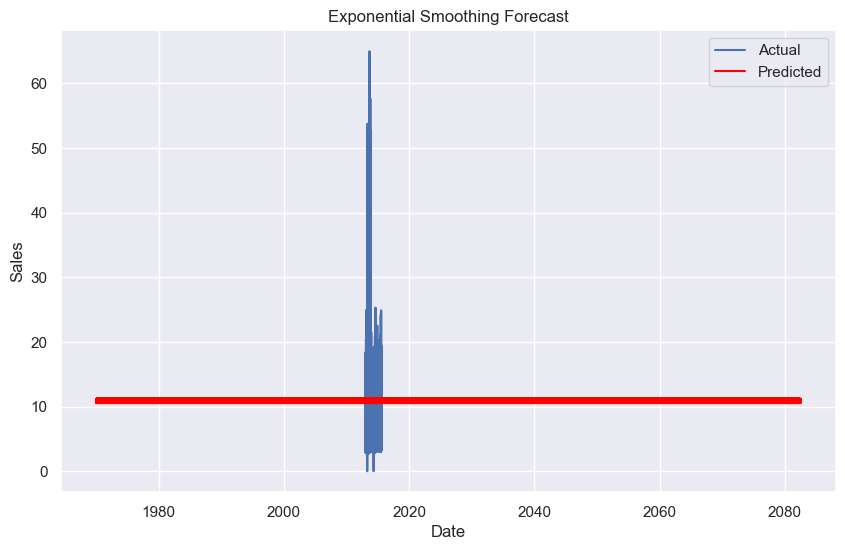

In [56]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


time_series = train_data_merged['SalesPerCustomer']

# Apply Exponential Smoothing
model = ExponentialSmoothing(time_series, seasonal='add', seasonal_periods=7)
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(time_series), end=len(time_series) + len(test_data_merged) - 1)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Actual')
plt.plot(test_data_merged.index, predictions, color='red', label='Predicted')
plt.legend()
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

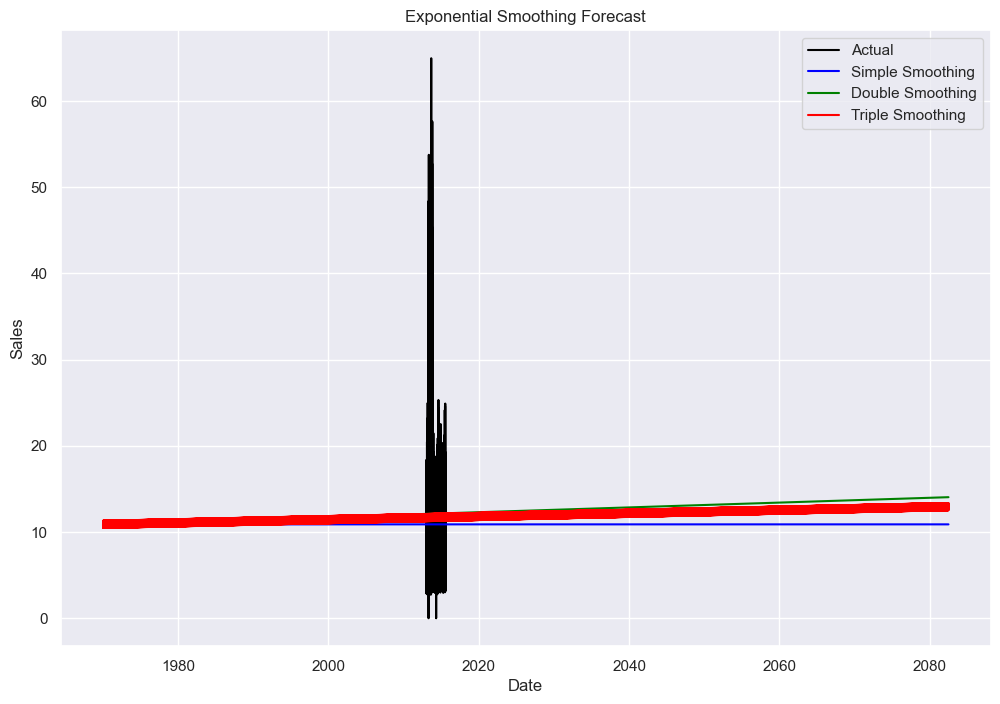

In [57]:
# Simple Exponential Smoothing
model_simple = ExponentialSmoothing(time_series, trend=None, seasonal=None)
model_fit_simple = model_simple.fit()
predictions_simple = model_fit_simple.predict(start=len(time_series), end=len(time_series) + len(test_data_merged) - 1)

# Double Exponential Smoothing (Holt's Method)
model_double = ExponentialSmoothing(time_series, trend='add', seasonal=None)
model_fit_double = model_double.fit()
predictions_double = model_fit_double.predict(start=len(time_series), end=len(time_series) + len(test_data_merged) - 1)

# Triple Exponential Smoothing (Holt-Winters' Method)
model_triple = ExponentialSmoothing(time_series, trend='add', seasonal='add', seasonal_periods=7)
model_fit_triple = model_triple.fit()
predictions_triple = model_fit_triple.predict(start=len(time_series), end=len(time_series) + len(test_data_merged) - 1)

# Plot actual vs. predicted values for all methods
plt.figure(figsize=(12, 8))
plt.plot(time_series, label='Actual', color='black')
plt.plot(test_data_merged.index, predictions_simple, label='Simple Smoothing', color='blue')
plt.plot(test_data_merged.index, predictions_double, label="Double Smoothing", color='green')
plt.plot(test_data_merged.index, predictions_triple, label="Triple Smoothing", color='red')
plt.legend()
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


In [58]:
pip install prophet


DEPRECATION: Loading egg at c:\users\manil\anaconda3\lib\site-packages\rossman_sales_project-0.0.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\manil\anaconda3\lib\site-packages\rossman_sales_project-0.1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


20:42:37 - cmdstanpy - INFO - Chain [1] start processing
20:44:32 - cmdstanpy - INFO - Chain [1] done processing


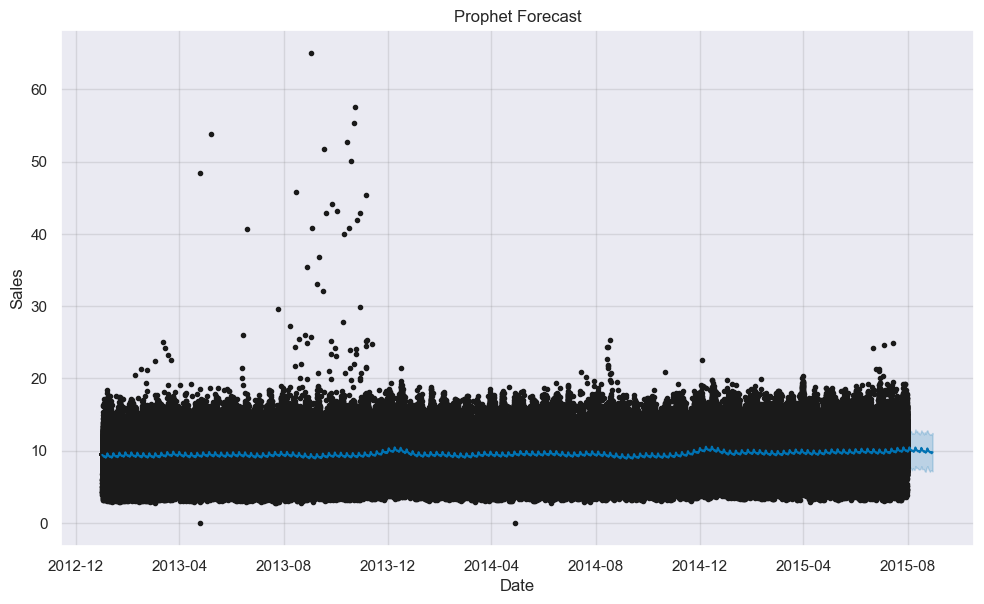

In [59]:
from prophet import Prophet

# Reset the index of the train_data_merged DataFrame
train_data_reset_index = train_data_merged.reset_index()

train_data_prophet = train_data_reset_index[['Date', 'SalesPerCustomer']].rename(columns={'Date': 'ds', 'SalesPerCustomer': 'y'})

# Create a sample time series data using the min and max dates
date_rng = pd.date_range(start=min_date, end=max_date, freq='D')
time_series_data = pd.DataFrame({'ds': date_rng, 'y': range(len(date_rng))})

# Fit Prophet model
model = Prophet()
model.fit(train_data_prophet)

# Create future dataframe for predictions
future = model.make_future_dataframe(periods=30)

# Make predictions for the next 30 days
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Prophet Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [60]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\manil\anaconda3\lib\site-packages\rossman_sales_project-0.0.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\manil\anaconda3\lib\site-packages\rossman_sales_project-0.1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [61]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\manil\anaconda3\lib\site-packages\rossman_sales_project-0.0.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\manil\anaconda3\lib\site-packages\rossman_sales_project-0.1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [62]:
from tensorflow import keras

In [63]:
selected_column ='SalesPerCustomer'

time_series_data = train_data_merged[selected_column].values


In [64]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler.fit_transform(time_series_data.reshape(-1, 1))

# Define the number of time steps to look back
look_back = 10  # You can adjust this value

In [65]:
# Prepare the input sequences and target values
X = []
y = []
for i in range(len(normalized_data) - look_back):
    X.append(normalized_data[i:i + look_back])
    y.append(normalized_data[i + look_back])
X = np.array(X)
y = np.array(y)

# Split the data into training and validation sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))
X_train, X_val = X[:split_index], X[split_index:]
y_train, y_val = y[:split_index], y[split_index:]



Epoch 1/10
25430/25430 - 183s - loss: 8.8185e-04 - val_loss: 9.6411e-04 - 183s/epoch - 7ms/step
Epoch 2/10
25430/25430 - 193s - loss: 8.7274e-04 - val_loss: 9.5963e-04 - 193s/epoch - 8ms/step
Epoch 3/10
25430/25430 - 152s - loss: 8.7076e-04 - val_loss: 9.3803e-04 - 152s/epoch - 6ms/step
Epoch 4/10
25430/25430 - 152s - loss: 8.6938e-04 - val_loss: 9.5859e-04 - 152s/epoch - 6ms/step
Epoch 5/10
25430/25430 - 158s - loss: 8.6790e-04 - val_loss: 9.6930e-04 - 158s/epoch - 6ms/step
Epoch 6/10
25430/25430 - 155s - loss: 8.6473e-04 - val_loss: 9.2879e-04 - 155s/epoch - 6ms/step
Epoch 7/10
25430/25430 - 162s - loss: 8.6146e-04 - val_loss: 9.2759e-04 - 162s/epoch - 6ms/step
Epoch 8/10
25430/25430 - 144s - loss: 8.5800e-04 - val_loss: 9.3138e-04 - 144s/epoch - 6ms/step
Epoch 9/10
25430/25430 - 147s - loss: 8.5220e-04 - val_loss: 9.1505e-04 - 147s/epoch - 6ms/step
Epoch 10/10
25430/25430 - 145s - loss: 8.4157e-04 - val_loss: 8.9174e-04 - 145s/epoch - 6ms/step


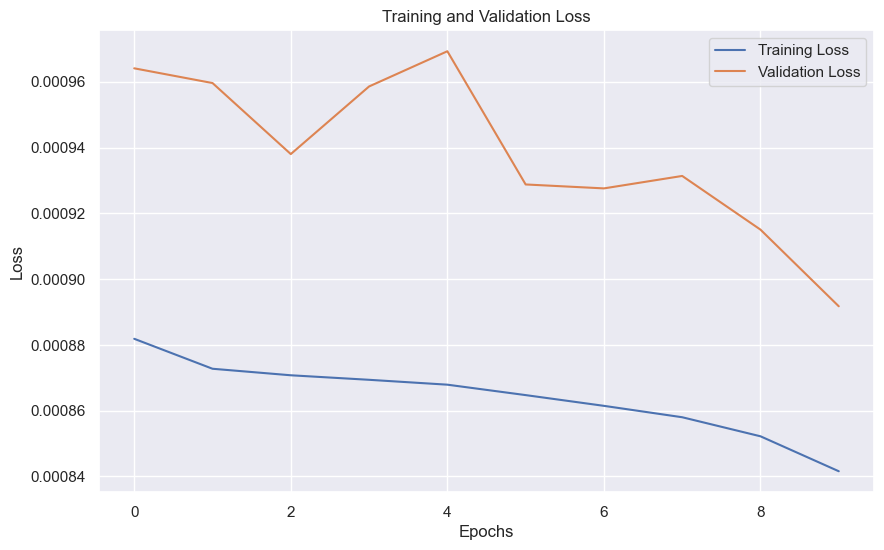

In [71]:

# Build the LSTM model
model = keras.Sequential()
model.add(keras.layers.LSTM(units=64, input_shape=(look_back, 1)))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=2)

# Plot training loss and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()




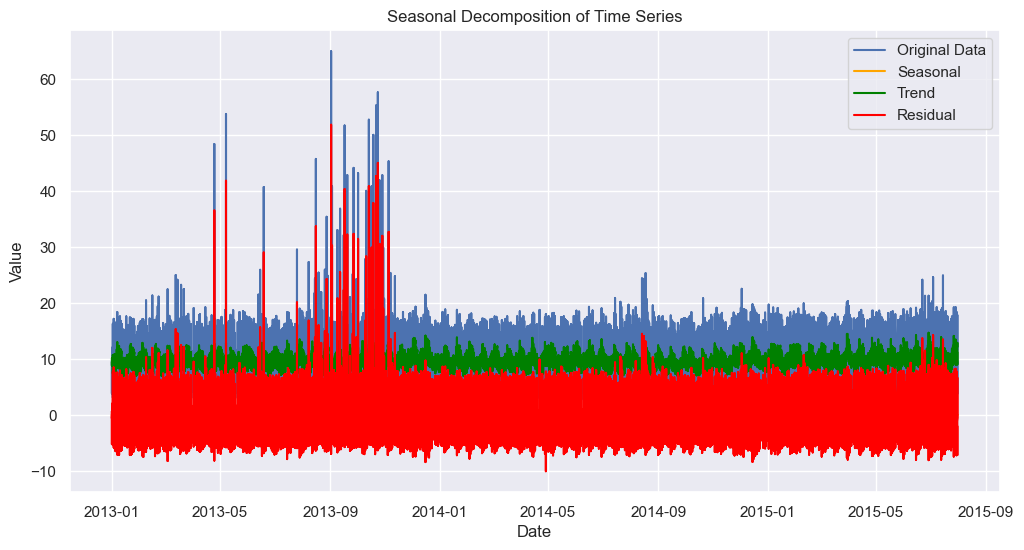

In [72]:
from statsmodels.tsa.seasonal import STL

from statsmodels.tsa.seasonal import seasonal_decompose

selected_column ='SalesPerCustomer'

# Perform seasonal decomposition using statsmodels
decomposition = seasonal_decompose(train_data_merged[selected_column], period=13)

# Get the seasonal, trend, and residual components
seasonal = decomposition.seasonal
trend = decomposition.trend
residual = decomposition.resid

# Plot the components
plt.figure(figsize=(12, 6))
plt.plot(train_data_merged[selected_column], label='Original Data')
plt.plot(seasonal, label='Seasonal', color='orange')
plt.plot(trend, label='Trend', color='green')
plt.plot(residual, label='Residual', color='red')
plt.legend()
plt.title('Seasonal Decomposition of Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()



In [73]:
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping
early_stop = EarlyStopping(monitor = "loss", mode = "min", patience = 7)
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(30,1)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(30))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Bidirectional(LSTM(128, activation='relu')))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [74]:
import pickle

In [75]:
# Save the model using pickle
with open('lstm_model.pickle', 'wb') as f:
    pickle.dump(model, f)